In [1]:
#Import Libraries 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
##Import & print DataSet
df=pd.read_csv(r"E:\data set\SampleSuperstore.csv")

df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


DATA CLEANING

In [3]:
## See Rows & columns 
df.shape

(9994, 13)

In [4]:
##See Dataset info 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB
None


In [5]:
##See Count of null values in each coulumn
pd.isnull(df).sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

EXPLORATORY DATA ANALYSIS (EDA)

In [6]:
# summary of DataSet
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.857901,3.789574,0.156203,28.656599
std,32063.693350,623.245124,2.225110,0.206452,234.260115
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [16]:
## SEE TOTAL SALES 
sale=df["Sales"].sum()
print(sale)

2297199.8603000003


total sales is : 2297199.860

In [41]:
##See Avg profit 
ang=df["Profit"].mean()
print(ang)

28.656599049429655


In [18]:
## See Avg sales by category
average_sales = df.groupby('Category')['Sales'].mean().reset_index()

print(average_sales)

          Category       Sales
0        Furniture  349.834416
1  Office Supplies  119.324101
2       Technology  452.709276


In [19]:
## See Avg sales by sub category
average_sal = df.groupby('Sub-Category')['Sales'].mean().reset_index()

print(average_sal)

   Sub-Category        Sales
0   Accessories   215.974604
1    Appliances   230.755710
2           Art    34.068834
3       Binders   133.560560
4     Bookcases   503.859633
5        Chairs   532.332420
6       Copiers  2198.941618
7     Envelopes    64.867724
8     Fasteners    13.936774
9   Furnishings    95.825668
10       Labels    34.303055
11     Machines  1645.553313
12        Paper    57.284092
13       Phones   371.211534
14      Storage   264.590553
15     Supplies   245.650200
16       Tables   648.791636


In [20]:
##see top 10 most buying Sub-Catgory 
total_sales_sorted = average_sal.sort_values(by='Sales', ascending=False)
top_10_sub_categories = total_sales_sorted.head(10)
print(top_10_sub_categories)

   Sub-Category        Sales
6       Copiers  2198.941618
11     Machines  1645.553313
16       Tables   648.791636
5        Chairs   532.332420
4     Bookcases   503.859633
13       Phones   371.211534
14      Storage   264.590553
15     Supplies   245.650200
1    Appliances   230.755710
0   Accessories   215.974604


In [38]:
##See top 10 buying city 
count=df.groupby("City")["Sales"].sum().reset_index()



In [39]:
total_sor = count.sort_values(by='Sales', ascending=False)
t10=total_sor.head(10)
print(t10)

              City        Sales
329  New York City  256368.1610
266    Los Angeles  175851.3410
452        Seattle  119540.7420
438  San Francisco  112669.0920
374   Philadelphia  109077.0130
207        Houston   64504.7604
80         Chicago   48539.5410
437      San Diego   47521.0290
216   Jacksonville   44713.1830
464    Springfield   43054.3420


In [40]:
##SEE top 10 buying State 
sum = df.groupby("State")['Sales'].sum().reset_index()
sor=sum.sort_values(by = 'Sales', ascending=False)
tp10=sor.head(10)
print(tp10)

           State        Sales
3     California  457687.6315
30      New York  310876.2710
41         Texas  170188.0458
45    Washington  138641.2700
36  Pennsylvania  116511.9140
8        Florida   89473.7080
11      Illinois   80166.1010
33          Ohio   78258.1360
20      Michigan   76269.6140
44      Virginia   70636.7200


In [43]:
## See sales by region
reg = df.groupby('Region')['Sales'].mean().reset_index()

print(reg)

    Region       Sales
0  Central  215.772661
1     East  238.336110
2    South  241.803028
3     West  226.493233


In [44]:
## See sales by segment
seg = df.groupby('Segment')['Sales'].mean().reset_index()

print(seg)

       Segment       Sales
0     Consumer  223.733451
1    Corporate  233.823300
2  Home Office  240.972041


In [45]:
## See sales by shipmode
sh = df.groupby('Ship Mode')['Sales'].mean().reset_index()

print(sh)

        Ship Mode       Sales
0     First Class  228.497024
1        Same Day  236.396179
2    Second Class  236.088725
3  Standard Class  227.583067


Data VISUALIZATION 

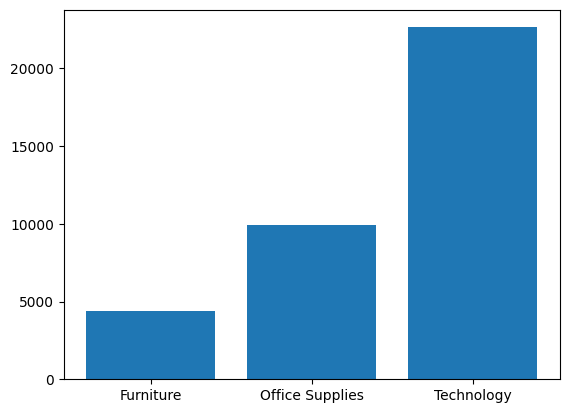

In [52]:
##Sales BY Category BARCHART
plt.bar(df["Category"],df["Sales"])
plt.show()

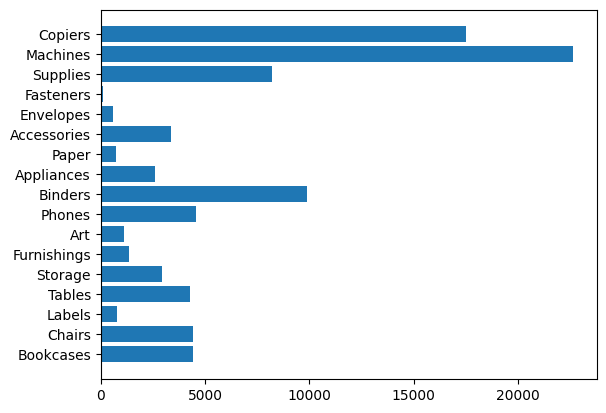

In [60]:
##SALES by sub category 
plt.barh(df['Sub-Category'],df["Sales"])
plt.show()

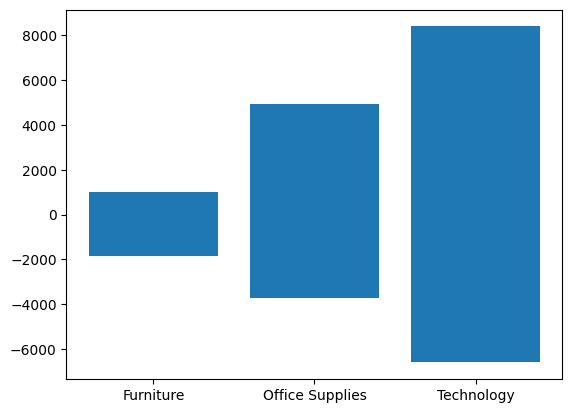

In [65]:
##profit BY Category BARCHART
plt.bar(df["Category"],df["Profit"])
plt.show()

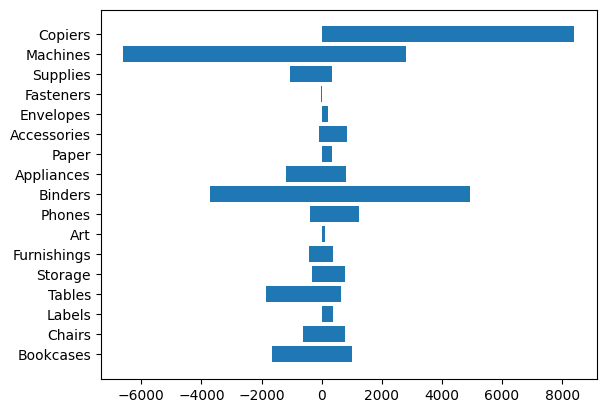

In [66]:
##profits by sub category 
plt.barh(df['Sub-Category'],df["Profit"])
plt.show()